In [17]:
import cv2 # computer vision library   
import helpers # helper functions

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images

from simple_convnet import SimpleConvNet 
from common.multi_layer_net import MultiLayerNet
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer


# of training data:  297
# of teating data:  1187
(75, 32, 3)
yellow


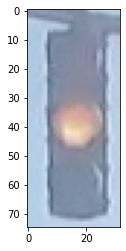

In [18]:
#<<이미지 파일 경로에서 불러오기>>

IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST = "traffic_light_images/test/"

# Using the load_dataset function in helpers.py
# Load training datas
IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TRAINING)
TEST_IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TEST)

print("# of training data: ",len(TEST_IMAGE_LIST))
print("# of teating data: ",len(IMAGE_LIST))

selected_image = IMAGE_LIST[723][0]
plt.imshow(selected_image)
print(selected_image.shape)
print(IMAGE_LIST[723][1])

In [19]:
#<<레이블 0,1 형식으로 바꾸기>>
def one_hot_encode(label):
    ## TODO: Create a one-hot encoded label that works for all classes of traffic lights
    one_hot_encoded = [] 
    if label =="red":
        one_hot_encoded = [1, 0, 0]
    elif label =="yellow":
        one_hot_encoded = [0, 1, 0]
    else:
        one_hot_encoded = [0, 0, 1]
        
    return one_hot_encoded

In [20]:
#<<이미지 32*32로 만들기>>
def standardize_input(image):
    #Rersize it 
    standard_im = np.copy(image)
    standard_im = cv2.resize(image, (32, 32))
    return standard_im
    

(32, 32, 3)
yellow


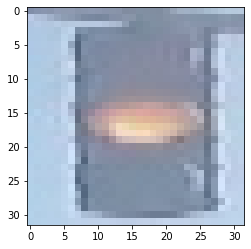

In [21]:
#<<인풋 이미지 출력 해보기>>
selected_image = standardize_input(IMAGE_LIST[723][0])
plt.imshow(selected_image)
print(selected_image.shape)
print(IMAGE_LIST[723][1])

In [22]:
#<<인풋사진이랑 레이블 내가 원하는 형식으로 정리하기.>>

#이미지 access 할려면 x_t_list[0][n] , x_image_np 모양은(n,3,32,32)
#그릴려면 plt.imshow(x_t_list[0][n].T) 하기
#레이블 access 할려면 x_t_list[1][n]

def format(image_list):

    x_t_list = list()

    x_image =[]
    t_label=[]

    for i in range(len(image_list)):
        image = np.array(standardize_input(image_list[i][0]))
        image = np.transpose(image, (2, 1, 0))
        x_image.append(image)

        label = np.array(one_hot_encode(image_list[i][1]))
        t_label.append(label)

    x_image_np= np.array(x_image)
    t_label_np = np.array(t_label)
    
    x_t_list = [x_image_np,t_label_np]
    return x_t_list



FORMATTED_Training_Data = format(IMAGE_LIST)
FORMATTED_Test_Data = format(TEST_IMAGE_LIST)

[0 1 0]
(3, 32, 32)


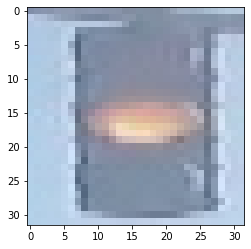

In [23]:
#(n,3,32,32로 잘 포맷 됐나 확인하는 코드)
n=723
print(FORMATTED_Training_Data[1][n])
plt.imshow(FORMATTED_Training_Data[0][n].T)
print(FORMATTED_Training_Data[0][n].shape)


In [26]:
#정확도 테스트 해보기
x_train = FORMATTED_Training_Data[0]
t_train = FORMATTED_Training_Data[1]
x_test = FORMATTED_Test_Data[0]
t_test = FORMATTED_Test_Data[1]

max_epochs = 20

'''
CNN_network = SimpleConvNet(input_dim=(3,32,32), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=10, output_size=3, weight_init_std=0.001)                        
CNN_trainer = Trainer(CNN_network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=50,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=100)
CNN_trainer.train()
'''



'''
Multi_network = MultiLayerNet(input_size=3072, hidden_size_list=[100,100,100], output_size=3, activation='relu', weight_init_std='relu', weight_decay_lambda=0.2)
Multi_trainer = Trainer(Multi_network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=100)
Multi_trainer.train()
'''



Multi_network_ext = MultiLayerNetExtend(input_size=3072, hidden_size_list=[100,100], output_size=3, activation='relu', weight_init_std='relu', weight_decay_lambda=0.1)
Multi_trainer_ext = Trainer(Multi_network_ext, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=100)
Multi_trainer_ext.train()



'''
Multi_network_ext.save_params("params.pkl")
print("Saved Network Parameters!")
print("accuracy list: ",Multi_trainer_ext.train_acc_list)

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, Multi_trainer_ext.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, Multi_trainer_ext.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
'''


train loss:34.28771209700032
accuracy ->  0.05
=== epoch:1, train acc:0.0, test acc:0.0 ===
train loss:30.725217209093962
accuracy ->  0.03
train loss:25.329140516458462
accuracy ->  0.02
train loss:22.71868099129563
accuracy ->  0.09
train loss:21.877057141298216
accuracy ->  0.07
train loss:19.76399397087305
accuracy ->  0.37
train loss:18.440928803223606
accuracy ->  0.54
train loss:17.834958592102776
accuracy ->  0.66
train loss:17.06962066943293
accuracy ->  0.82
train loss:16.65716241754468
accuracy ->  0.8
train loss:16.181593191121536
accuracy ->  0.86
train loss:15.838923183018576
accuracy ->  0.86
train loss:15.449819378433094
accuracy ->  0.84
train loss:15.054140359392228
accuracy ->  0.89
train loss:14.578589712548503
accuracy ->  0.93
train loss:14.2018755650579
accuracy ->  0.96
train loss:13.814233632054576
accuracy ->  1.0
train loss:13.524872359379437
accuracy ->  0.93
train loss:13.166438093360917
accuracy ->  0.93
train loss:12.916366725460065
accuracy ->  0.9
train

'\nMulti_network_ext.save_params("params.pkl")\nprint("Saved Network Parameters!")\nprint("accuracy list: ",Multi_trainer_ext.train_acc_list)\n\nmarkers = {\'train\': \'o\', \'test\': \'s\'}\nx = np.arange(max_epochs)\nplt.plot(x, Multi_trainer_ext.train_acc_list, marker=\'o\', label=\'train\', markevery=2)\nplt.plot(x, Multi_trainer_ext.test_acc_list, marker=\'s\', label=\'test\', markevery=2)\nplt.xlabel("epochs")\nplt.ylabel("accuracy")\nplt.ylim(0, 1.0)\nplt.legend(loc=\'lower right\')\nplt.show()\n'